### Training of CNN  

#### Import libraries  

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import Dropout,Flatten,Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras.utils import to_categorical

import  os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # for mac OS

#### Uncomment these lines to fix random sequences 

In [2]:
#import random
#import tensorflow as tf
#seedval = 13
#tf.random.set_seed(seedval)
#np.random.seed(seedval)
#random.seed(seedval)
#os.environ["PYTHONHASHSEED"] = str(seedval)

#### Parameters  

In [3]:
w=56
work_dir=os.path.join('data', 'dogs_cats')
npy_data_base='dogs_cats-data'
npy_labels_base='dogs_cats-labels'
classes=['cats', 'dogs']
num_classes=len(classes)

model_file="dogs_cats-model-w{}.h5".format(w)
history_file="dogs_cats-history-w{}.csv".format(w)

#### Read files and convert data format  

In [4]:
mode="train"
npy_data_file='{}-{}-w{}.npy'.format(npy_data_base, mode, w)
data_file_path=os.path.join(work_dir, npy_data_file)
npy_labels_file='{}-{}-w{}.npy'.format(npy_labels_base, mode, w)
labels_file_path=os.path.join(work_dir, npy_labels_file)
X_train=np.load(data_file_path).astype('float16')
X_train/=255
y_train=np.load(labels_file_path)
y_train=to_categorical(y_train, num_classes)

mode="test"
npy_data_file='{}-{}-w{}.npy'.format(npy_data_base, mode, w)
data_file_path=os.path.join(work_dir, npy_data_file)
npy_labels_file='{}-{}-w{}.npy'.format(npy_labels_base, mode, w)
labels_file_path=os.path.join(work_dir, npy_labels_file)
X_test=np.load(data_file_path).astype("float16")
X_test/=255
y_test=np.load(labels_file_path)
y_test=to_categorical(y_test, num_classes)

print( X_train.shape )
print( y_train.shape )
print( X_test.shape )
print( y_test.shape )
img_rows=X_train.shape[1]
img_cols=X_train.shape[2]
img_channels=X_train.shape[3]
print("image_size:", img_rows, img_cols)
print("image_channels:", img_channels)

(2000, 56, 56, 3)
(2000, 2)
(400, 56, 56, 3)
(400, 2)
image_size: 56 56
image_channels: 3


#### Structure of CNN  

In [5]:
input_shape=(img_rows,img_cols,img_channels)
model=Sequential()
model.add(Conv2D(32, (3,3), activation='relu', padding='same',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 56, 56, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 28, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 28, 28, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 32)        0

#### Training of CNN  

In [6]:
%%time
n_epochs=100
val_split=0.2
batch_size=128
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',
              metrics=['accuracy'])
cl=CSVLogger(history_file)
es=EarlyStopping(monitor='val_loss', patience=12, verbose=1)
fit_log=model.fit(X_train, y_train, batch_size=batch_size,
                  epochs=n_epochs, validation_split=val_split,
                  callbacks=[cl, es])

Epoch 1/100
13/13 [==============================] - 2s 84ms/step - loss: 0.7146 - accuracy: 0.5169 - val_loss: 0.6928 - val_accuracy: 0.5100
Epoch 2/100
13/13 [==============================] - 1s 64ms/step - loss: 0.6930 - accuracy: 0.5188 - val_loss: 0.6909 - val_accuracy: 0.5150
Epoch 3/100
13/13 [==============================] - 1s 67ms/step - loss: 0.6933 - accuracy: 0.5113 - val_loss: 0.6915 - val_accuracy: 0.4925
Epoch 4/100
13/13 [==============================] - 1s 57ms/step - loss: 0.6903 - accuracy: 0.4969 - val_loss: 0.6906 - val_accuracy: 0.5125
Epoch 5/100
13/13 [==============================] - 1s 67ms/step - loss: 0.6882 - accuracy: 0.5519 - val_loss: 0.6787 - val_accuracy: 0.5850
Epoch 6/100
13/13 [==============================] - 1s 63ms/step - loss: 0.6918 - accuracy: 0.5800 - val_loss: 0.6808 - val_accuracy: 0.6175
Epoch 7/100
13/13 [==============================] - 1s 56ms/step - loss: 0.6643 - accuracy: 0.6119 - val_loss: 0.6589 - val_accuracy: 0.6625
Epoch 

#### Visualization of training progress  

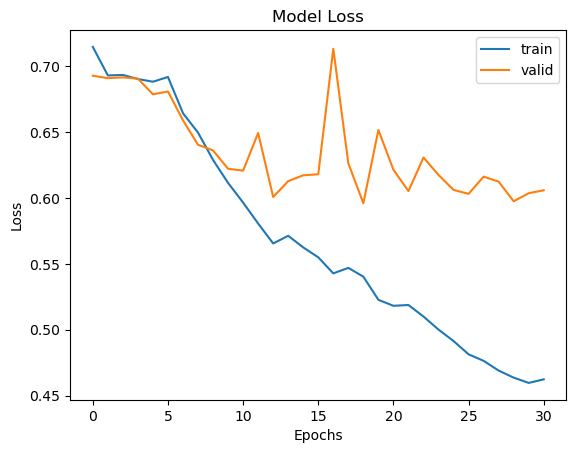

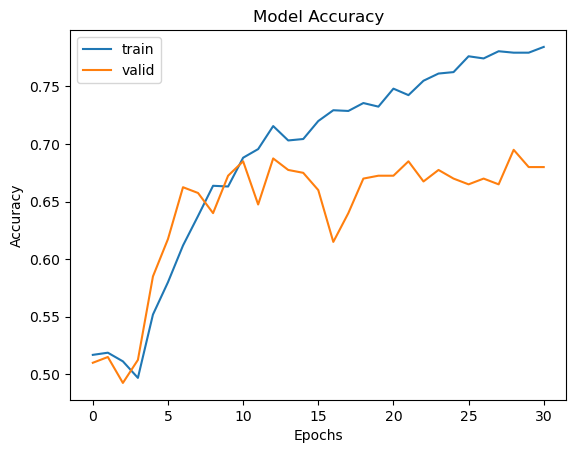

In [7]:
loss=fit_log.history['loss']
val_loss=fit_log.history['val_loss']
acc=fit_log.history['accuracy']
val_acc=fit_log.history['val_accuracy']
epoch=range(len(loss))

plt.plot(epoch, loss, label='train')
plt.plot(epoch, val_loss, label='valid')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epoch, acc, label='train')
plt.plot(epoch, val_acc, label='valid')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Visualization of training progress (from file) 

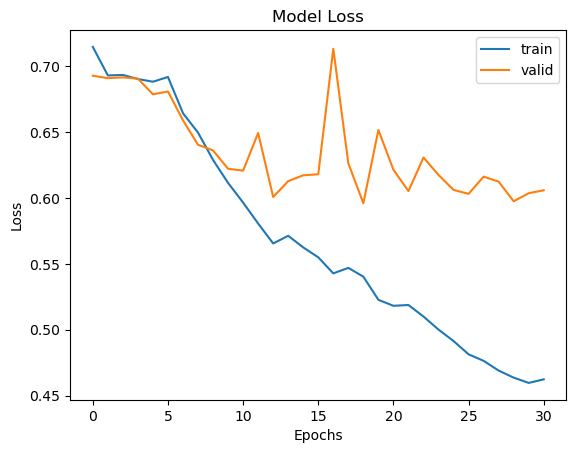

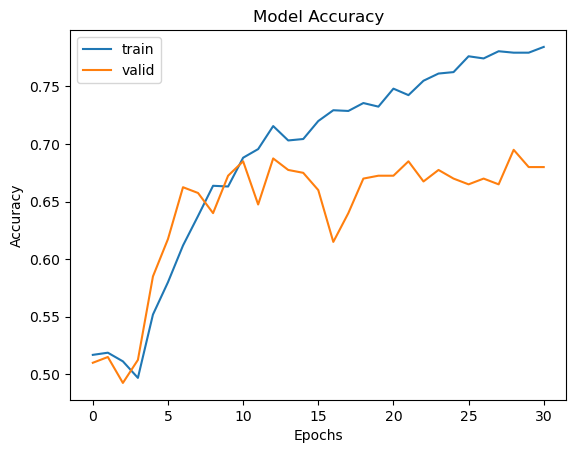

In [8]:
df=pd.read_csv(history_file, sep=',', skiprows=0, header=0)
loss=df['loss']
val_loss=df['val_loss']
acc=df['accuracy']
val_acc=df['val_accuracy']
epoch=df['epoch']

plt.plot(epoch, loss, label='train')
plt.plot(epoch, val_loss, label='valid')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epoch, acc, label='train')
plt.plot(epoch, val_acc, label='valid')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Generalization performance  

In [9]:
score=model.evaluate(X_test, y_test, verbose=0)
print('loss=', score[0])
print('accuracy=', score[1])

loss= 0.569922924041748
accuracy= 0.6924999952316284


In [10]:
y_test_pred=model.predict(X_test, verbose=0)
ct = pd.crosstab(y_test.argmax(axis=1),
                 y_test_pred.argmax(axis=1))
display(ct)

col_0,0,1
row_0,,
0,164,36
1,87,113


#### Save model to file  

In [11]:
model.save(model_file)